In [1]:
import pandas as pd
import numpy as np
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read data
train_raw = pd.read_csv("input/train.csv")
test_raw = pd.read_csv("input/test.csv")

### Data overview

In [3]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_raw.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_raw.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Eustis, Miss. Elizabeth Mussey",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test_raw.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Ford, Mr. Arthur",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [8]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Ticket** has large number of duplicates in both train and test set. I will explore this a further below.

### Missing values

In [9]:
# missing values
train_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# missing values
test_raw.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We observe that:
-  in the **training set**, some values of *Age*, *Cabin*, and *Embarked* are missing
-  in the **test set**, some values of *Age*, *Fare*, and *Cabin* are missing
-  for **Cabin**, more than half of values is missinf in each set and therefore I will remove this feature
-  the rest of the missing values will be populated with estimates derived from the valid data

### Working copies of the datasets
Before removing and modifying features, I will make copies of the origianl datasets

In [11]:
# deep copy to copy data and indeces
train = train_raw.copy(deep=True)
test = test_raw.copy(deep=True)

# dropping Passenger's IDs and Cabin
train = train.drop(['PassengerId', 'Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

For the missing values of **Age**, I'll deal with those below, where I'll bin the age data and assign a specific bin to the missing values. For now, let's set the NaN age to -1.

In [96]:
train['Age'] = train['Age'].fillna(-1)
test['Age'] = test['Age'].fillna(-1)

Two values are missing in the **Embarked** column of the train set. 

In [13]:
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Let's have a look on the distribution of possible values of Embarked in the combined dataset.

In [14]:
(pd.concat([train,test])).groupby('Embarked').count()['Sex']

Embarked
C    270
Q    123
S    914
Name: Sex, dtype: int64

Embarking in Southampton is by far the most common one and I will populate the missing values in the train set by 'S'.

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')

One value is missing in the **Fare** column of the test set.

In [16]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


Let's have a look if Fare is correlated with any other feature.

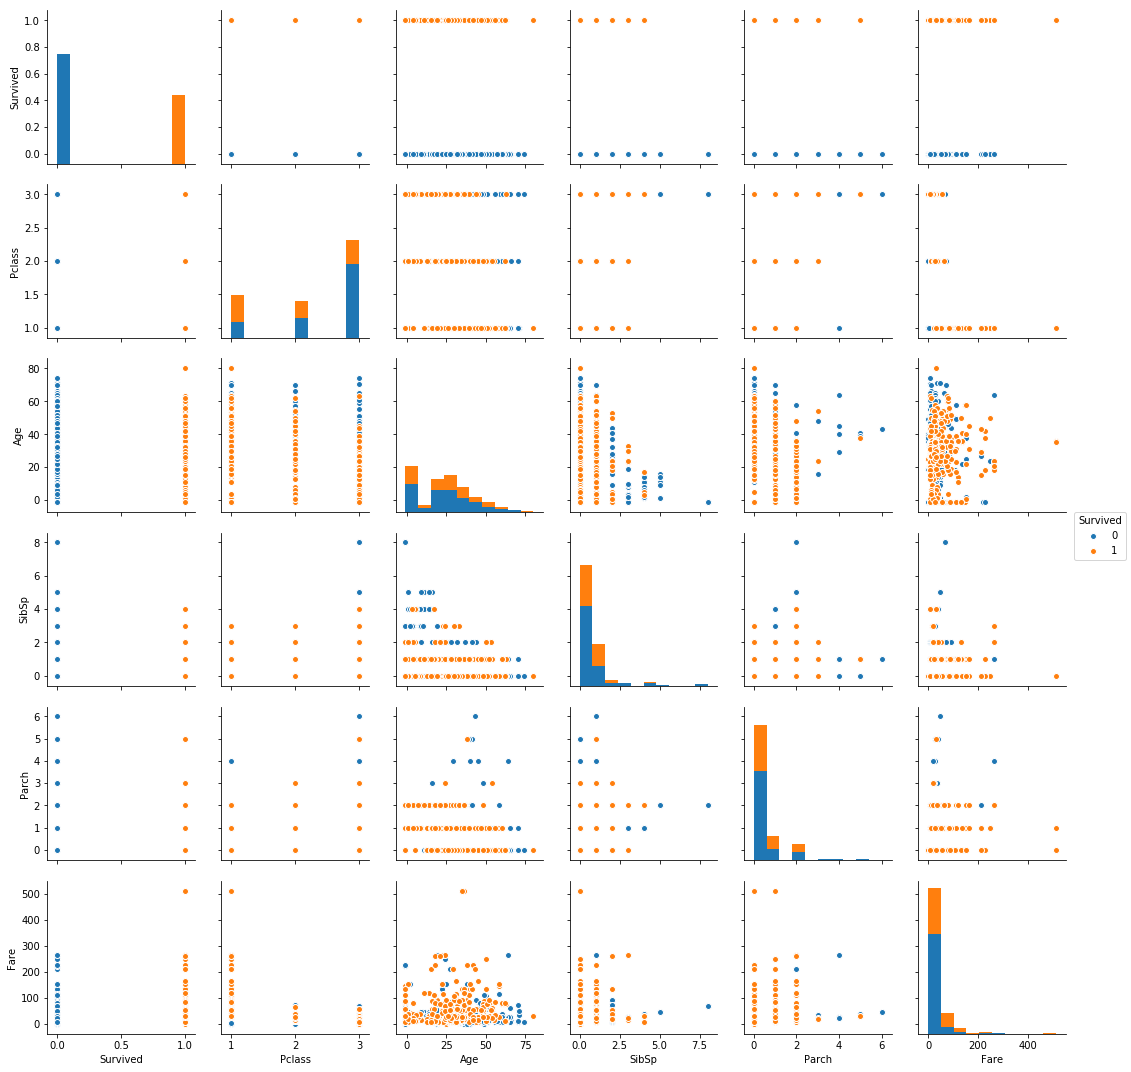

In [17]:
sns.pairplot(train, hue="Survived", dropna=True)

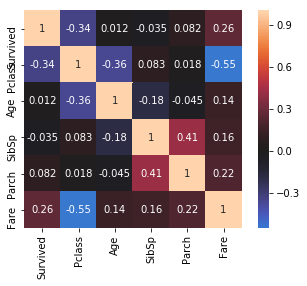

In [18]:
corr = train.corr()
sns.heatmap(corr, square=True, annot=True, center=0)

PClass is strongly correlated with Fare -- the lower the class, the lower is the Fare. Let's populate the single NaN Fare value in the test set by the mean Fare for given Pclass, that is Pclass of 3.

In [19]:
mean_fare_3 = np.nanmean(pd.concat([train[train['Pclass']==3]['Fare'],test[test['Pclass']==3]['Fare']]).values)
print("Mean Fare of passengers with Pclass==3:", mean_fare_3)
test['Fare'] = test['Fare'].fillna(mean_fare_3)

Mean Fare of passengers with Pclass==3: 13.3028887006


There are still missing values for *Age* and we will deal with those below.

In [20]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

### Feature engineering
**Ticket** -- Abowe analysis showed that more than half of the values in Ticket are duplicated. Let's have a closer look on the examples

In [22]:
pd.concat(g for _, g in train.groupby("Ticket") if len(g) > 1)[:20]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
257,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,S
504,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,S
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,S
262,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,S
585,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S
110,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,S
475,0,1,"Clifford, Mr. George Quincy",male,-1.0,0,0,110465,52.0000,S
329,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,C
523,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,C


It seems that the same Ticket is associated with people traveling together -- they often have same names (married couple, family) and same cabin. Is this correlated with survival?

In [23]:
train['Alone'] = 1
train.loc[train.duplicated(subset='Ticket'),'Alone'] = 0

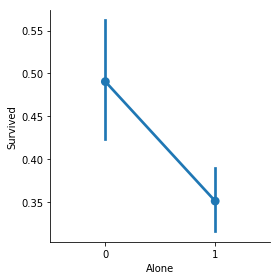

In [24]:
sns.factorplot(x="Alone", y="Survived", data=train)

It looks like the new feature **Alone** is correlated with the survival. So I will keep it and I will drop the feature Ticket now.

In [25]:
test['Alone'] = 1
test.loc[test.duplicated(subset='Ticket'),'Alone'] = 0

In [26]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

**Name** -- The feature does not bring much insight as it is. A popular (and logical) method among Kaggle kernels is to extract the title of each person from their names. The title corresponds to social and economic status and might be correlated with survival.

In [27]:
# the following is adopted from 
# https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [28]:
pd.concat([train,test]).groupby('Title').count()['Sex']

Title
Master     61
Miss      264
Mr        757
Mrs       198
Rare       29
Name: Sex, dtype: int64

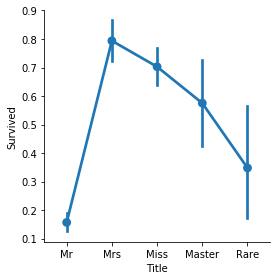

In [29]:
sns.factorplot(x="Title", y="Survived", data=train)

In [30]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

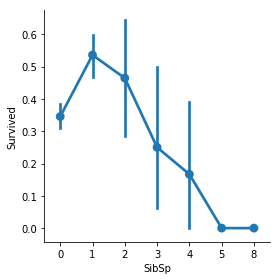

In [31]:
sns.factorplot(x="SibSp", y="Survived", data=train)

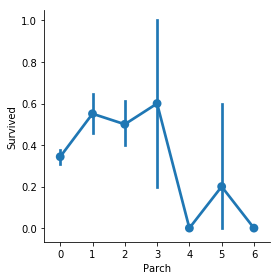

In [32]:
sns.factorplot(x="Parch", y="Survived", data=train)

In quite a few Kaggle kernels, I saw people using a variable mapping the family size of each passenger: Family size = number of children / parents + number of siblings = Parch + SibSp. 

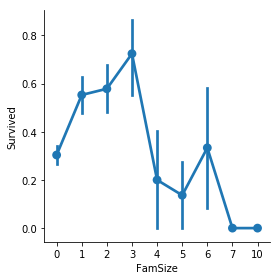

In [33]:
train['FamSize'] = train["Parch"].values+train["SibSp"]
sns.factorplot(x='FamSize', y="Survived", data=train)

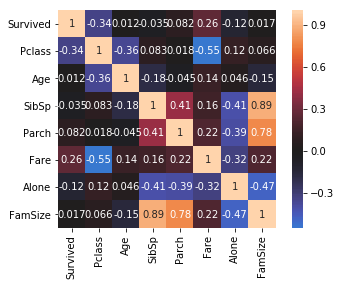

In [34]:
corr = train.corr()
sns.heatmap(corr, square=True, annot=True, center=0)

From the above plot it is not obvious to me that FamSize should be more corraleted than Parch and SibSp separately. Probably best test it in production though.

In [35]:
test['FamSize'] = test["Parch"].values+test["SibSp"]

### Categorical variables into dummy variables
Categorical variables (Sex, Title, Alone, and Embarked) are better transformed to dummy variable (see e.g. [here](http://pbpython.com/categorical-encoding.html)) . I will also add Pclass, because its integer represantation doesn't map the variable well -- e.g. Pclass of 2 is not twice better than of 1. Dummy variable representation might work better than the integer numerical value for Pclass.

In [36]:
pd.concat([train,test]).groupby('Sex').count()['Age']

Sex
female    441
male      782
Name: Age, dtype: int64

In [37]:
pd.concat([train,test]).groupby('Title').count()['Age']

Title
Master     57
Miss      249
Mr        700
Mrs       188
Rare       29
Name: Age, dtype: int64

In [38]:
pd.concat([train,test]).groupby('Alone').count()['Age']

Alone
0    259
1    964
Name: Age, dtype: int64

In [39]:
pd.concat([train,test]).groupby('Embarked').count()['Age']

Embarked
C    250
Q     99
S    874
Name: Age, dtype: int64

In [40]:
pd.concat([train,test]).groupby('Pclass').count()['Age']

Pclass
1    314
2    272
3    637
Name: Age, dtype: int64

In [41]:
data = [train, test]
dummies = ['Pclass', 'Sex', 'Embarked', 'Alone', 'Title']

# keeps the original variable as well
train = pd.concat([train, pd.get_dummies(train[dummies], columns=dummies)], axis=1)
test = pd.concat([test, pd.get_dummies(test[dummies], columns=dummies)], axis=1)

# replaces the original variable by the dummy columns
#train = pd.get_dummies(train, columns=dummies)
#test = pd.get_dummies(test, columns=dummies)

In [43]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Alone', 'Title', 'FamSize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Alone_0', 'Alone_1', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

### Continuous variables binning
We are left with five continous variables: *Age*, *Rate*, *SibSp*, *Parch*, and the newly introduced *FamSize*. 

**Age** has a substantial number of examples with a missing value. Let's have a look on some distributions. First just the distribution (histogram) of ages in the training set. 

How does age relate to survival?

Text(0,0.5,'#')

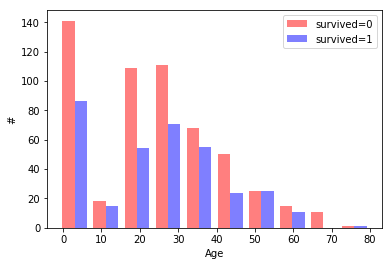

In [44]:
plt.hist([train.loc[train['Survived']==0,'Age'].values, train.loc[train['Survived']==1,'Age'].values], 
         color=['r','b'], 
         alpha=0.5,
         label=['survived=0','survived=1'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('#')

We see that the fractions of survivals differ for different ages. This correlation could be more pronounced if we introduce binning in *Age*. Binning can also help to prevet overfitting (which I experienced as a major issue in my earlier modeling). Let's explore the binning choice.

Text(0,0.5,'#')

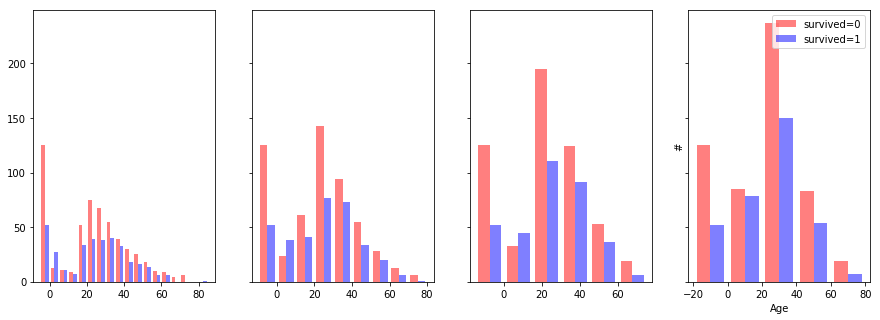

In [45]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,5))
data_plot = [train.loc[train['Survived']==0,'Age'].values, train.loc[train['Survived']==1,'Age'].values]
hist_arg = {'color': ['r','b'], 
            'alpha': 0.5,
            'label':['survived=0','survived=1']}
for bin_size,ax in zip([5,10,15,20],[ax1,ax2,ax3,ax4]):
    ax.hist(data_plot, 
            bins=range(-bin_size,90,bin_size),
            **hist_arg)
plt.legend()
plt.xlabel('Age')
plt.ylabel('#')

([array([  10.,   19.,   23.,  176.,  149.,   37.,   10.]),
  array([  20.,   19.,   22.,   95.,  107.,   26.,    1.])],
 array([  0,   4,  12,  18,  30,  50,  65, 100]),
 <a list of 2 Lists of Patches objects>)

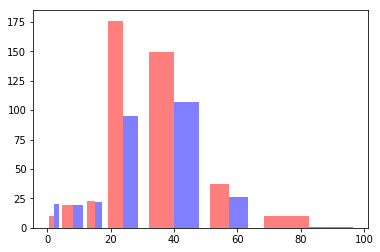

In [46]:
# this is binning used by Li-Yen Hsu in his/her kernel: Titanic - Neural Network
# in https://www.kaggle.com/liyenhsu/titanic-neural-network

plt.hist(data_plot, 
         bins=[ 0, 4, 12, 18, 30, 50, 65, 100],
         **hist_arg)

In [47]:
age_0 = train.loc[train['Survived']==0,'Age'].values
age_1 = train.loc[train['Survived']==1,'Age'].values

for bin_size in [5,10,15,20]:
    bins_0 = np.histogram(age_0,bins=range(-bin_size,90,bin_size), range=(-bin_size,80))
    bins_1 = np.histogram(age_1,bins=range(-bin_size,90,bin_size), range=(-bin_size,80))
    print(bins_1[0]/(bins_0[0]+bins_1[0]))

# and Li-Yen Hsu binning again
bins = [ 0, 4, 12, 18, 30, 50, 65, 100]
bins_0 = np.histogram(age_0,bins=bins)
bins_1 = np.histogram(age_1,bins=bins)
print(bins_1[0]/(bins_0[0]+bins_1[0]))

[ 0.29378531  0.675       0.5         0.4375      0.39534884  0.34210526
  0.35849057  0.42105263  0.45833333  0.375       0.3902439   0.4375      0.375
  0.4         0.          0.                 nan  1.        ]
[ 0.29378531  0.61290323  0.40196078  0.35        0.43712575  0.38202247
  0.41666667  0.31578947  0.14285714]
[ 0.29378531  0.57692308  0.3627451   0.42325581  0.40449438  0.24      ]
[ 0.29378531  0.48170732  0.3875969   0.39416058  0.26923077]
[ 0.66666667  0.5         0.48888889  0.35055351  0.41796875  0.41269841
  0.09090909]


/home/lucie/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


I am not sure what is the best bins choice. This is definitelly something to test / work on in the future.
I will go with the last option, mostly because it is a nonlinear binning which combines smaller bins for younger ages, where the survival rate is higher, and larger bins for older passengers.


In [115]:
bins_age = [ 0, 4, 12, 18, 30, 50, 65, 100]
lab_ages = [0,1,2,3,4,5,6]

But what about the missing values of *Age*? Perhpas they could be infered from the other data. Let's have a look on some correlations.

In [49]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Alone', 'Title', 'FamSize', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Alone_0', 'Alone_1', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

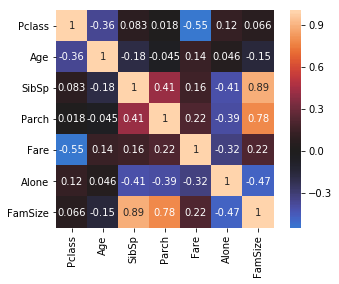

In [50]:
cols_for_age_corr = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
             'Embarked', 'Alone', 'FamSize']
corr = (train[cols_for_age_corr]).corr()
sns.heatmap(corr, square=True, annot=True, center=0)

It looks that *Age* has quite a strong correlation with *Pclass*. What about *Titles*? Let's plot age distribution for different titles and calculate the mean age and its STD.

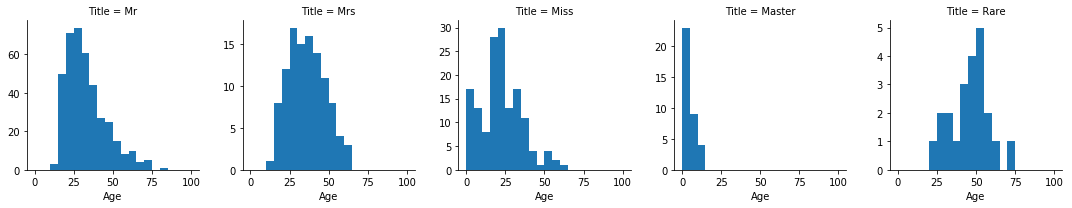

In [51]:
grid = sns.FacetGrid(train, col='Title', sharey=False)
grid.map(plt.hist, 'Age', bins=range(0,105,5))
plt.show()

In [58]:
data_all = pd.concat([train,test])
print('mean', data_all.loc[data_all['Age']>0,['Title', 'Age']].groupby(['Title']).mean())
print('std', data_all.loc[data_all['Age']>0,['Title', 'Age']].groupby(['Title']).std())

mean               Age
Title            
Master   5.482642
Miss    21.824366
Mr      32.252151
Mrs     36.918129
Rare    45.178571
std               Age
Title            
Master   4.161554
Miss    12.171431
Mr      12.422089
Mrs     12.902087
Rare    11.105733


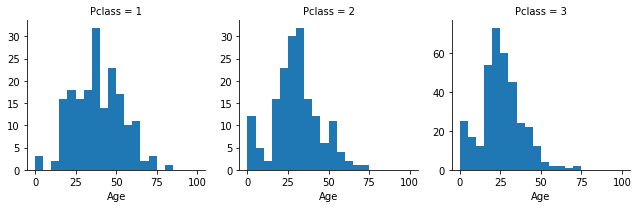

In [53]:
grid = sns.FacetGrid(train, col='Pclass', sharey=False)
grid.map(plt.hist, 'Age', bins=range(0,105,5))
plt.show()

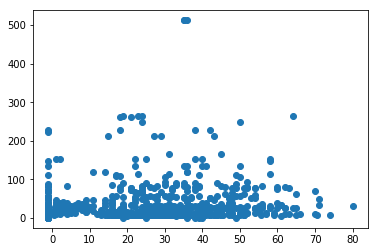

In [54]:
plt.scatter(train['Age'].values, train['Fare'])

In [55]:
train.loc[train['Age']<0].groupby('Title').count()['Sex']

Title
Master      4
Miss       36
Mr        119
Mrs        17
Rare        1
Name: Sex, dtype: int64

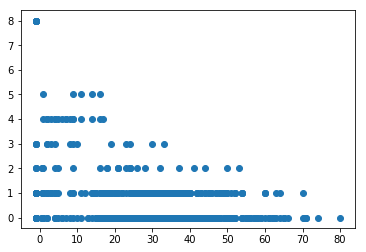

In [56]:
plt.scatter(train['Age'].values, train['SibSp'])

Hmmm, it looks like that there are some correlations. The strongest one is with title and that's what I'll use. I will simply fill the missing age with a random value with Gaussian distribution of the mean and SDT of given *Title*. Future work here could be invested in more sophisticated estimate of missing ages (e.g. through some ML models, see https://www.kaggle.com/liyenhsu/titanic-neural-network).

In [100]:
means = data_all.loc[data_all['Age']>0,['Title', 'Age']].groupby(['Title']).mean()
stds = data_all.loc[data_all['Age']>0,['Title', 'Age']].groupby(['Title']).std()

np.random.seed(seed=666)
data = [train,test]
for data_i in data:
    ages_i = []
    for index, row in data_i[data_i['Age']<0].iterrows():
        mu = means.loc[means.index==row['Title'],'Age'].values
        std = stds.loc[stds.index==row['Title'],'Age'].values
        ages_i.append(np.random.normal(mu,std)[0])
    #print(ages_i)
    data_i.loc[data_i['Age']<0,'Age'] = ages_i

[42.490289108847819, 38.214331825150424, 52.058314899254718, 43.54442739284741, 14.865698156929385, 30.891966668391625, 37.163632982017639, 10.337443788451392, 40.209408121773038, 22.482884465829557, 39.815588651369495, 20.68703950462757, 33.73073051447038, 23.098089797564842, 28.541268321060059, 26.530694142788651, 0.95157024534719525, 25.099876071078693, 11.347008466633095, 24.613878560584965, 10.431196763810963, 42.744252944565801, 35.695801252655677, 42.846970133260221, 24.192921782862438, 48.533009690677787, 51.429913919253636, 15.385094824493667, 28.448266039589726, 29.749029728924771, 23.549039298968385, 8.3422035010041142, 36.5816969802719, 21.944819844997703, 6.7167662197761269, 18.018609282660712, 24.658512684245135, 22.04428121225914, 48.49288371352138, 33.942532076892185, 18.676167206920773, 46.050181007854533, 29.911526971414922, 31.73676777776048, 9.8380396672633736, 5.3651624658796848, 24.189565418919919, 25.077051444325221, 26.954457269321434, 55.596932145979963, 29.813

Now when the missing values for *Age* are filled, we can bin them.

In [125]:
for data_i in data:
    data_i['Age_bin'] = pd.cut(data_i.Age,bins_age,labels=lab_ages)
train = pd.concat([train, pd.get_dummies(train['Age_bin'], columns=['Age_bin'], prefix='Age_bin', prefix_sep='_')], axis=1)
test = pd.concat([test, pd.get_dummies(test['Age_bin'], columns=['Age_bin'], prefix='Age_bin', prefix_sep='_')], axis=1)

Lastly, I want to come back and have a brief look on **Fare** data. The original (and current, since I haven't changed anything about *Fare* feature) correlation with Survived is 0.25. However during reading through various Kaggle discussions, I came across the information that *Fare* was actualy charged for the whole group of passangers on the same ticket. Let's try recalculating *Fare* and see if the correlation is stronger then.

In [139]:
print(train_raw.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [146]:
n_on_ticket = []
for index, row in train_raw.iterrows():
    n_on_ticket.append(1.*sum(train_raw["Ticket"]==row['Ticket']))
fare_per_person = train_raw['Fare'].values/np.array(n_on_ticket)
train_raw['Fare_pp'] = fare_per_person

In [147]:
print(train_raw.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Fare_pp        -0.002230  0.254824 -0.655559  0.227631 -0.012298  0.060240   

                 Fare   Fare_pp  
PassengerId  0.012658 -0.002230  
Survived     0.257307  0.254824  
Pclass      -0.549500 -0.655559  
Age          0.096067  0.227631  
SibSp        0.159651 -0.012298  
Parch        0.216225  0.060240  
Fare         1.000000  0.839037  
Fare_pp      0.839037  1.

The correlation of *Fare_pp* (fare per person) and Survived is basically the same. The correlation of *Fare_pp* and *Pclass* and *Age* increased wrt to those with *Fare*; while with *SibSp* and *Parch* decresed. That make sense, because the number of people on a ticket should be related to *SibSp* and *Parch* and hence this dependency was removed by normalizing *Fare* by the number of people on the ticket. 

I'm not sure if *Fare_pp* can help, but let's add it to our working datasets.

In [154]:
train['Fare_pp'] = train_raw['Fare_pp']

In [155]:
# and now for test set
n_on_ticket = []
for index, row in test_raw.iterrows():
    n_on_ticket.append(1.*sum(test_raw["Ticket"]==row['Ticket']))
test['Fare_pp'] = test_raw['Fare'].values/np.array(n_on_ticket)